In [ ]:
# Importing y finance to download data from the yahoo website
!pip install yfinance --upgrade
# Importing numpy for numerical computations
import numpy as np
# Initializing the random number using random seed 
np.random.seed(1000)
# Importing pandas for creating data frames, viewing data and 
# general description  of data , 
import pandas as pd
# Importing scipy.stats for general statistics distributions 
import scipy.stats as scs
# Importing normal distribution from scipy stats
from scipy.stats import norm
# Importing matplotlib for creating static and visualizations in python 
import matplotlib as mpl
# Importing pyplot from matplotlib for plotting graphs
import matplotlib.pyplot as plt
# Importing y finance to download data from the yahoo website
import yfinance as yf
import statistics as st
# Importing seaborn for making statistical graphs 
import seaborn as sns
sns.set(style="ticks")
sns.set_style("darkgrid")
%matplotlib inline
# Installing opstrat plotting payoff diagram options.
!pip install opstrat
import opstrat as op
# importing multi_plotter from opstrat for plotting payoff diagram
#  involving multiple options.
from opstrat.basic_multi import multi_plotter
import warnings
warnings.filterwarnings('ignore')

     |████████████████████████████████| 6.4 MB 9.6 MB/s 
     |████████████████████████████████| 63 kB 833 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
# Downloading the data of Amazon and Google from the yahoo website from 
# 1 january  2004 to 3 March 2022 
# Assinging the variable data to the downloaded data sets
data = yf.download("GOOG AMZN",start="2004-01-01",end="2022-03-04")

[*********************100%***********************]  2 of 2 completed


In [ ]:
# Assigning the variable AM to the Adjacent closing data for Amazon 
# Assigning the variable GO to the Adjacent closing data for Google 
# Creating a data frame for adjacent closing data for Amazon and Google 
# and assigning the variable data_1 to the data frame
# Assigning the same index of Amazon to the index of the new data frame
AM=data['Adj Close']["AMZN"]
GO=data['Adj Close']["GOOG"]
data_1=pd.DataFrame(AM.values,columns=["AMZN"])
data_1['GOOG']=GO.values
data_1.index=AM.index

In [ ]:
# Viewing the first five rows of the data
# Google started stock trading on 19-August-2004, hence data is not available 
# for the first five days in 2004
data_1.head().T

Date,2004-01-02,2004-01-05,2004-01-06,2004-01-07,2004-01-08
AMZN,51.900002,53.27,53.029999,51.900002,50.240002
GOOG,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Computing the general statistics of the data 
data_1.describe().T


,count,mean,std,min,25%,50%,75%,max
AMZN,4574.0,751.747901,996.116846,26.070000,77.227501,260.195007,987.130005,3731.409912
GOOG,4416.0,683.080146,639.999911,49.818268,246.823601,431.231140,979.739990,3014.179932


2. 

In [ ]:
# Computing the returns of the amazon stocks and viewing the first five returns 
# of the stocks
returns = (AM-AM.shift(1))-1;returns.head()


Date
2004-01-02         NaN
2004-01-05    0.369999
2004-01-06   -1.240002
2004-01-07   -2.129997
2004-01-08   -2.660000
Name: AMZN, dtype: float64

Text(0, 0.5, 'Stock price')

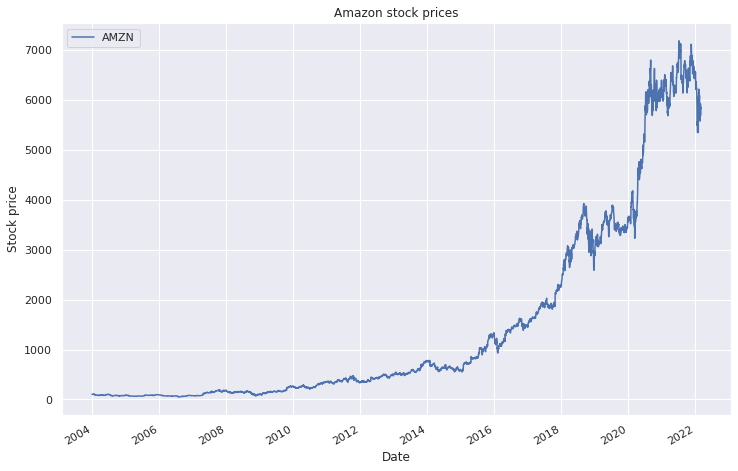

In [ ]:
# Plotting stock  prices for Amazon 
(data_1/data_1.iloc[0] *100)[['AMZN']].plot(figsize=(12,8))
# Creating the title for the plot 
plt.title("Amazon stock prices")
# Creating the x-label for the plot 
plt.xlabel("Date")
# Creating the y-label for the plot 
plt.ylabel("Stock price")

3. 


In [ ]:
# Computing the log returns for the data sets and viewing 
# the first fives log returns

log_returns = np.log(data_1/data_1.shift(1));log_returns.head()


,AMZN,GOOG
Date,,
2004-01-02,NaN,NaN
2004-01-05,0.026055,NaN
2004-01-06,-0.004516,NaN
2004-01-07,-0.021539,NaN
2004-01-08,-0.032507,NaN


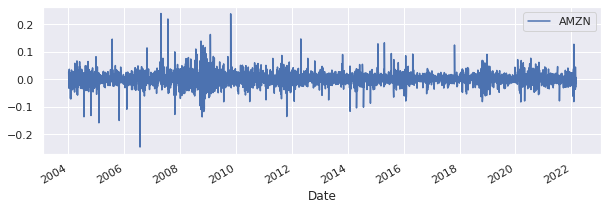

In [ ]:
# plotting the graph for log returns for the data set  
log_returns[['AMZN']].plot(figsize=(10,3))

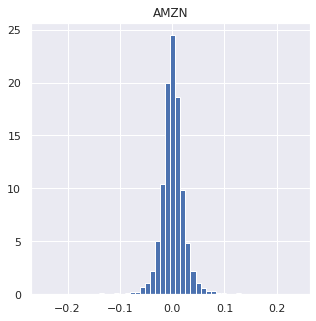

In [ ]:
# Plotting the histogram Amazon returns 
log_returns[['AMZN']].hist(bins=50, figsize=(5,5),density=True)

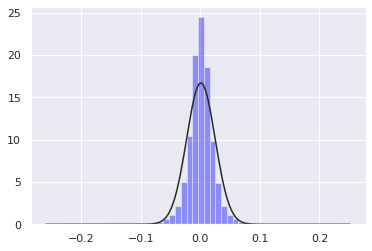

In [ ]:
# Plotting the histogram and normal distribution for Amazon 
sns.distplot(log_returns[['AMZN']],hist=True,fit=norm,bins=50,color='blue',kde=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4499e186d0>]],
      dtype=object)

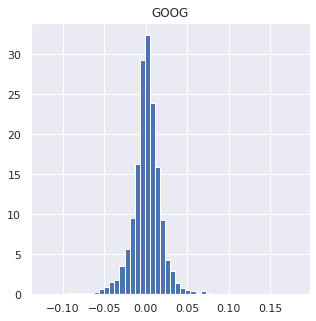

In [ ]:
# Plotting the histogram google returns 
log_returns[['GOOG']].hist(bins=50, figsize=(5,5),density=True)


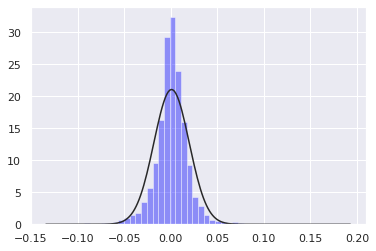

In [ ]:
# Plotting the histogram of google returns and the normal distribution with 
# same mean and variance
y=sns.distplot(log_returns[['GOOG']],hist=True,fit=norm,bins=50,color='blue',kde=False)



In [ ]:
# Defining a function that calculates the general statistics
def print_statistics(array):  
    ''' Prints selected statistics.
    Parameters
    ==========
    array: ndarray       (object to generate statistics on)
    '''
    sta = scs.describe(array)
    print ("%14s %15s" % ('statistic', 'value'))
    print (30 * "-")
    # printing the size of the data set
    print ("%14s %15.5f" % ('size', sta[0]))
    # printing the minimum of the data set
    print ("%14s %15.5f" % ('min', sta[1][0]))
    # printing the maximum of the data set 
    print ("%14s %15.5f" % ('max', sta[1][1]))
    # printing the mean of the data set 
    print ("%14s %15.5f" % ('mean', sta[2]))
    # printing the variance of the data set
    print ("%14s %15.5f" % ('variance',(sta[3])))
    # printing the skewness of the data set 
    print ("%14s %15.5f" % ('skewness', sta[4]))
    # printing the kurtosis of the data set
    print ("%14s %15.5f" % ('kurtosis', sta[5]))

In [ ]:
# creating a list for Google and Amazon
symbols=['GOOG','AMZN']
# creating a for loop that iterates from the list of symbols
for sym in symbols:
    print ("\n summary statistics for %s" % sym)
    print (30 * "-")
    # Assigning the variable log_data to an array of data of log returns and 
    # droping the missing values 
    log_data = np.array(log_returns[sym].dropna())
    # calling the function for printing statistics for log data 
    print_statistics(log_data)


 summary statistics for GOOG
------------------------------
     statistic           value
------------------------------
          size      4415.00000
           min        -0.12340
           max         0.18225
          mean         0.00090
      variance         0.00036
      skewness         0.44715
      kurtosis         8.97608

 summary statistics for AMZN
------------------------------
     statistic           value
------------------------------
          size      4573.00000
           min        -0.24618
           max         0.23862
          mean         0.00088
      variance         0.00057
      skewness         0.34618
      kurtosis        13.54405


4. 

Text(0.5, 1.0, 'qqplot of GOOG')

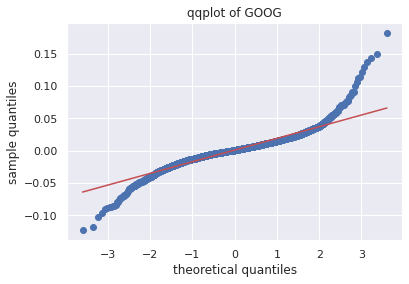

In [ ]:
# Plotting the qqplot to test normality of log returns for google
# using the scipy for plotting the log returns for google 
scs.probplot(log_returns['GOOG'].dropna(),plot=plt,fit=True)
# creating the xlabel for qqplot 
plt.xlabel('theoretical quantiles')
# creating the ylabel for qqplot
plt.ylabel('sample quantiles')
# creating the title for the qqplot
plt.title('qqplot of GOOG')

Text(0.5, 1.0, 'qqplot of AMZN')

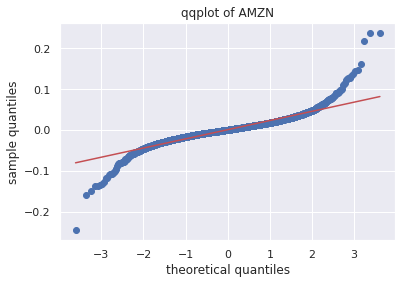

In [ ]:
# Plotting the qqplot to test normality of log returns for google
# using the scipy for plotting the log returns for google 
scs.probplot(log_returns['AMZN'].dropna(),plot=plt,fit=True)
# creating the xlabel for qqplot 
plt.xlabel('theoretical quantiles')
# creating the ylabel for qqplot
plt.ylabel('sample quantiles')
# creating the title for the qqplot
plt.title('qqplot of AMZN')

In [ ]:

# Assigning the variable AMZN_5yrs for 5 years amazon log returns from 
# 2017  
AMZN_5yrs=log_returns.loc['2017-03-02':'2022-03-03',['AMZN']];AMZN_5yrs.head()


,AMZN
Date,
2017-03-02,-0.004900
2017-03-03,0.001142
2017-03-06,-0.003855
2017-03-07,-0.000697
2017-03-08,0.005281


In [ ]:
# Assigning the variable AMZN_5yrs1 for 5 years amazon rolling log returns from 
# 2017  
# the rolling volatility was calculated using 252 days because a year has 252
# days of trading 
AMZN_5yrs1=AMZN_5yrs.rolling(252).std().shift();AMZN_5yrs1.head(254)

,AMZN
Date,
2017-03-02,NaN
2017-03-03,NaN
2017-03-06,NaN
2017-03-07,NaN
2017-03-08,NaN
...,...
2018-02-27,NaN
2018-02-28,NaN
2018-03-01,NaN


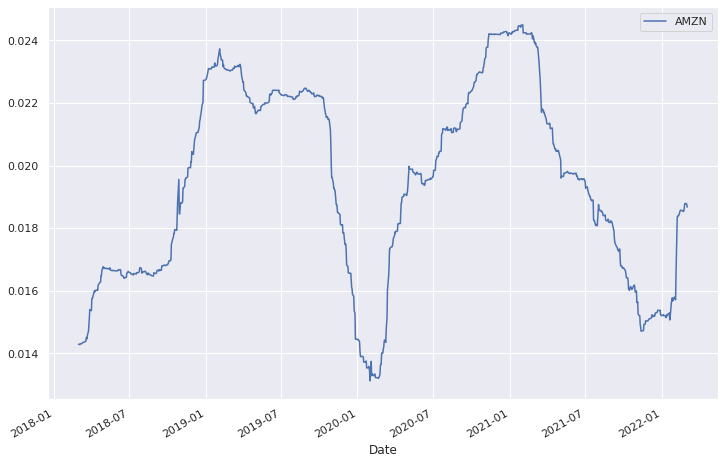

In [ ]:
# Plotting the rolling annual volatility for 5 years 
AMZN_5yrs1.plot(figsize=(12,8))


6. 


Text(0.5, 1.0, 'Autocorrelations of Log-returns of GOOG')

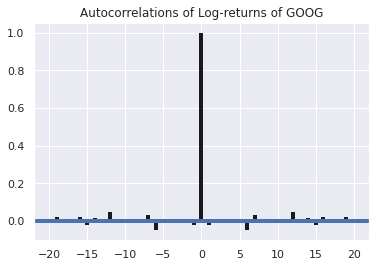

In [ ]:
# plotting the auto-correlation for google returns 
plt.acorr(log_returns['GOOG'].dropna(), maxlags=20,lw=4)
# creating the title for the plot
plt.title('Autocorrelations of Log-returns of GOOG')

Text(0.5, 1.0, 'Autocorrelations of Log-returns of AMZN')

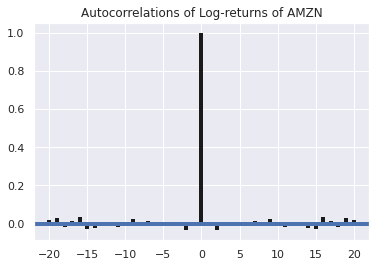

In [ ]:
# plotting the auto-correlation function for Amazon
plt.acorr(log_returns['AMZN'].dropna(), maxlags=20,lw=4)
# creating the title for the plot 
plt.title('Autocorrelations of Log-returns of AMZN')